# Suicide Analysis (1985-2016)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")
sns.set_palette("cubehelix", 8)

## Load data 

In [2]:
df = pd.read_csv('master.csv')

## Take a look of the dataset

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
# Number unique countries
df['country'].nunique()

101

In [6]:
#Change columns names
df.rename(columns={'suicides_no':'suicides', 'suicides/100k pop':'suicides/100k',\
                   ' gdp_for_year ($) ':'gdp/year ', 'gdp_per_capita ($)':'gdp/capita'}, inplace=True)

# Amoung of the data

In the following plots is shown the amoung of data we have for different groups

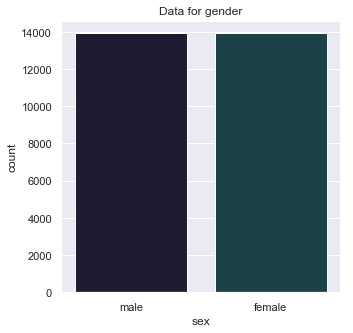

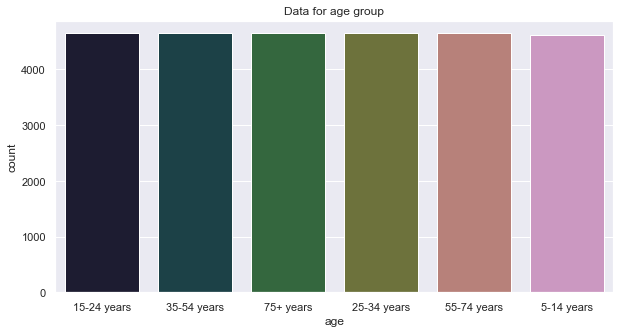

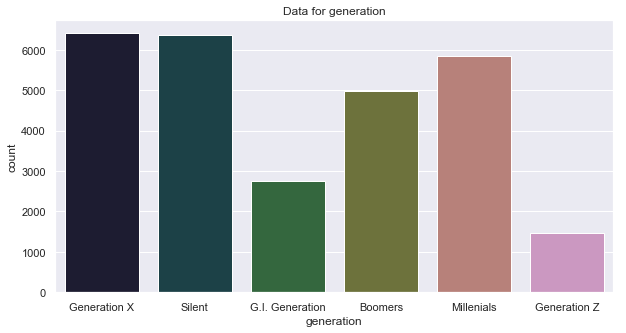

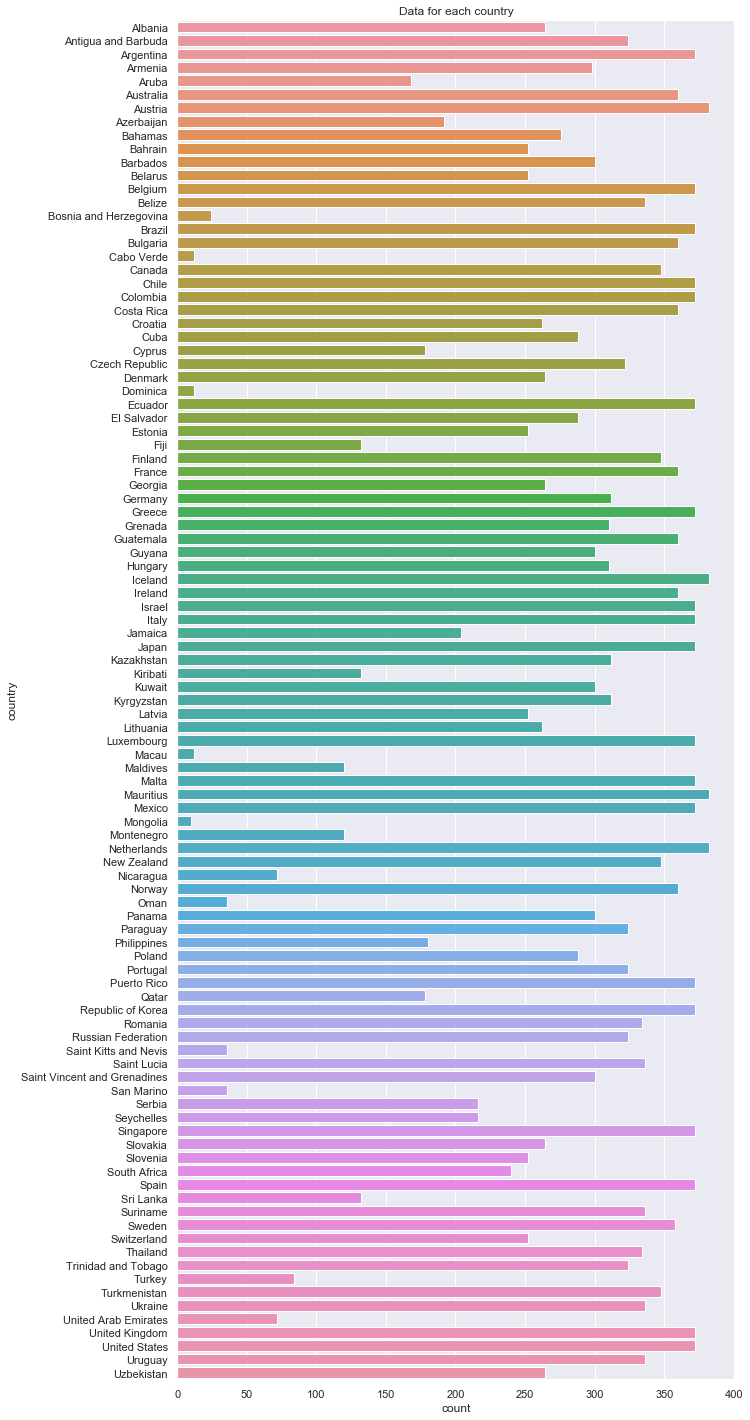

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=df)
plt.title('Data for gender')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='age', data=df)
plt.title('Data for age group')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='generation', data=df)
plt.title('Data for generation')
plt.show()

plt.figure(figsize=(10,25))
sns.countplot(y='country', data=df)
plt.title('Data for each country')
plt.show()

Therefore, the dataset contains the same amoung of data by gender and age group, but not for generation and country. 

# Global tendencies

I create a dataframe by country. The columns are the mean of each variable. 

In [8]:
byCountry = df.groupby('country').mean().sort_values('suicides/100k', ascending=False).reset_index()
byCountry.head()

,country,year,suicides,population,suicides/100k,HDI for year,gdp/capita
0,Lithuania,2005.419847,107.019084,2.598672e+05,40.415573,0.803500,9280.549618
1,Sri Lanka,1997.545455,421.522727,1.382770e+06,35.295152,0.638000,904.272727
2,Russian Federation,2002.000000,3733.771605,1.139137e+07,34.892377,NaN,6518.814815
3,Hungary,2003.419355,238.358065,8.020782e+05,32.761516,0.803875,9370.051613
4,Belarus,2001.095238,237.666667,7.832234e+05,31.075913,0.771200,3333.904762


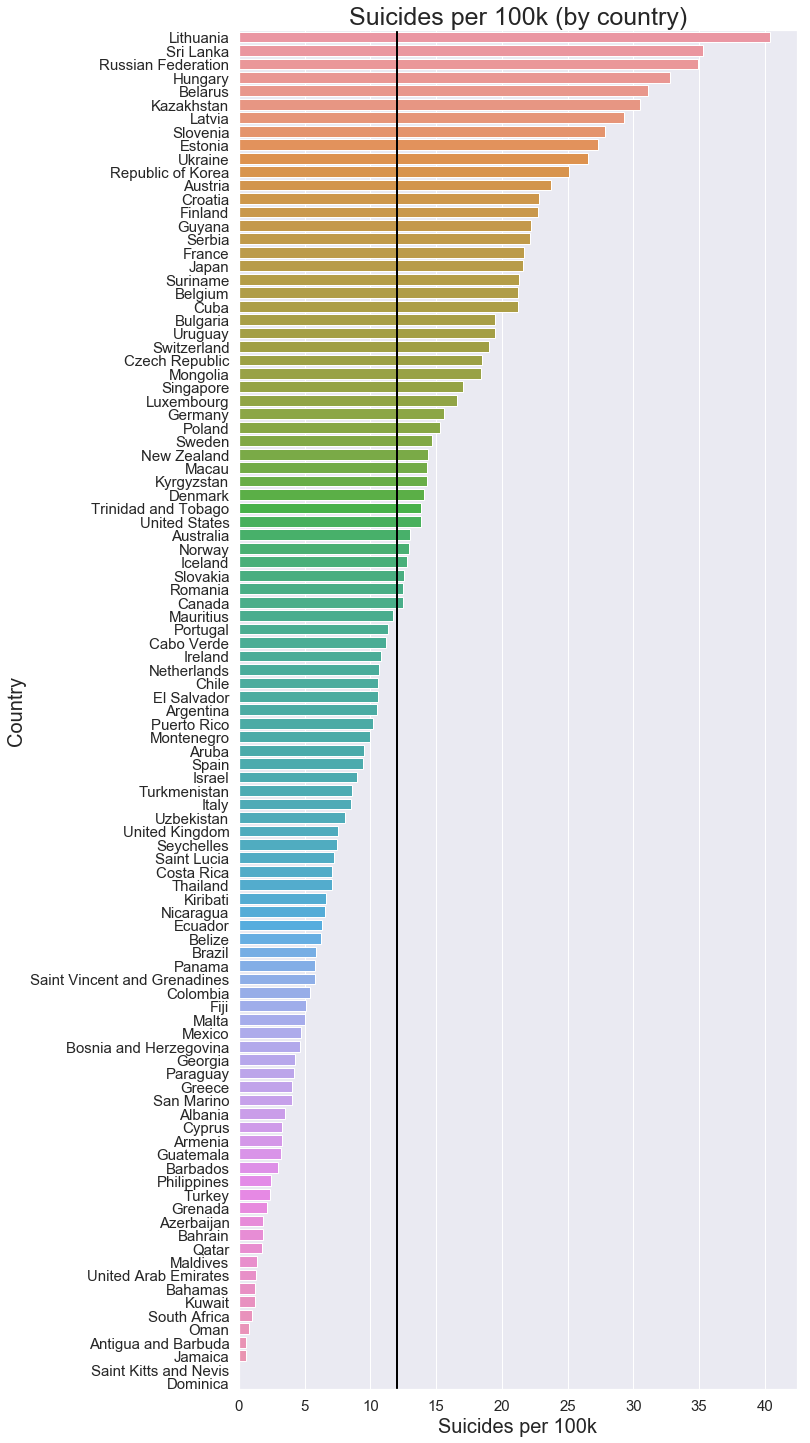

In [9]:
plt.figure(figsize=(10,25))
sns.barplot(x='suicides/100k', y ='country', data=byCountry)
plt.axvline(x = byCountry['suicides/100k'].mean(),color = 'black', linewidth=2)
plt.title('Suicides per 100k (by country)', fontsize=25)
plt.xlabel('Suicides per 100k', fontsize=20)
plt.ylabel('Country', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Correlation between suicides and gdp?

<Figure size 1080x1080 with 0 Axes>

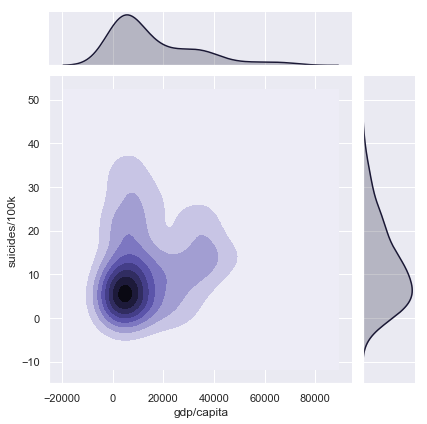

In [24]:
plt.figure(figsize=(15,15))
sns.jointplot(x='gdp/capita', y='suicides/100k', data=byCountry, kind='kde')
plt.show()

In [ ]:
sns.lineplot()

## Global information

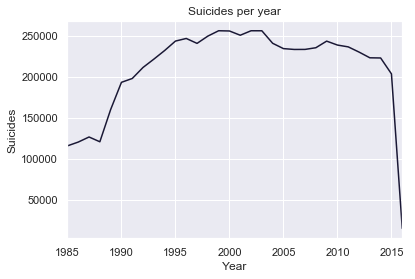

In [28]:
df.groupby('year').sum().plot(y='suicides')
plt.title('Suicides per year')
plt.xlabel('Year')
plt.ylabel('Suicides')
plt.legend().remove()

## Suicides per country

In [29]:
byCountry = df.groupby('country').sum()['suicides'].sort_values(ascending=True)

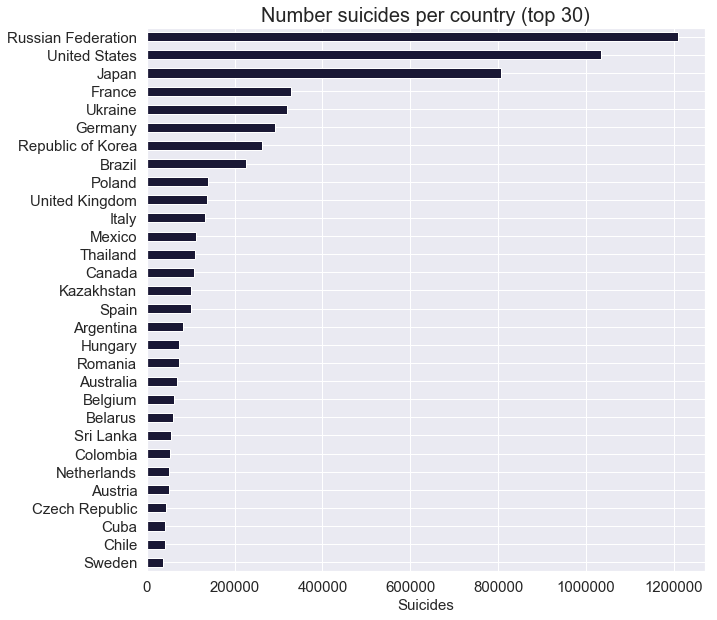

In [30]:
plt.figure(figsize=(10,10))
byCountry.tail(30).plot.barh()
plt.xlabel('Suicides',fontsize=15)
plt.ylabel('')
plt.title('Number suicides per country (top 30)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

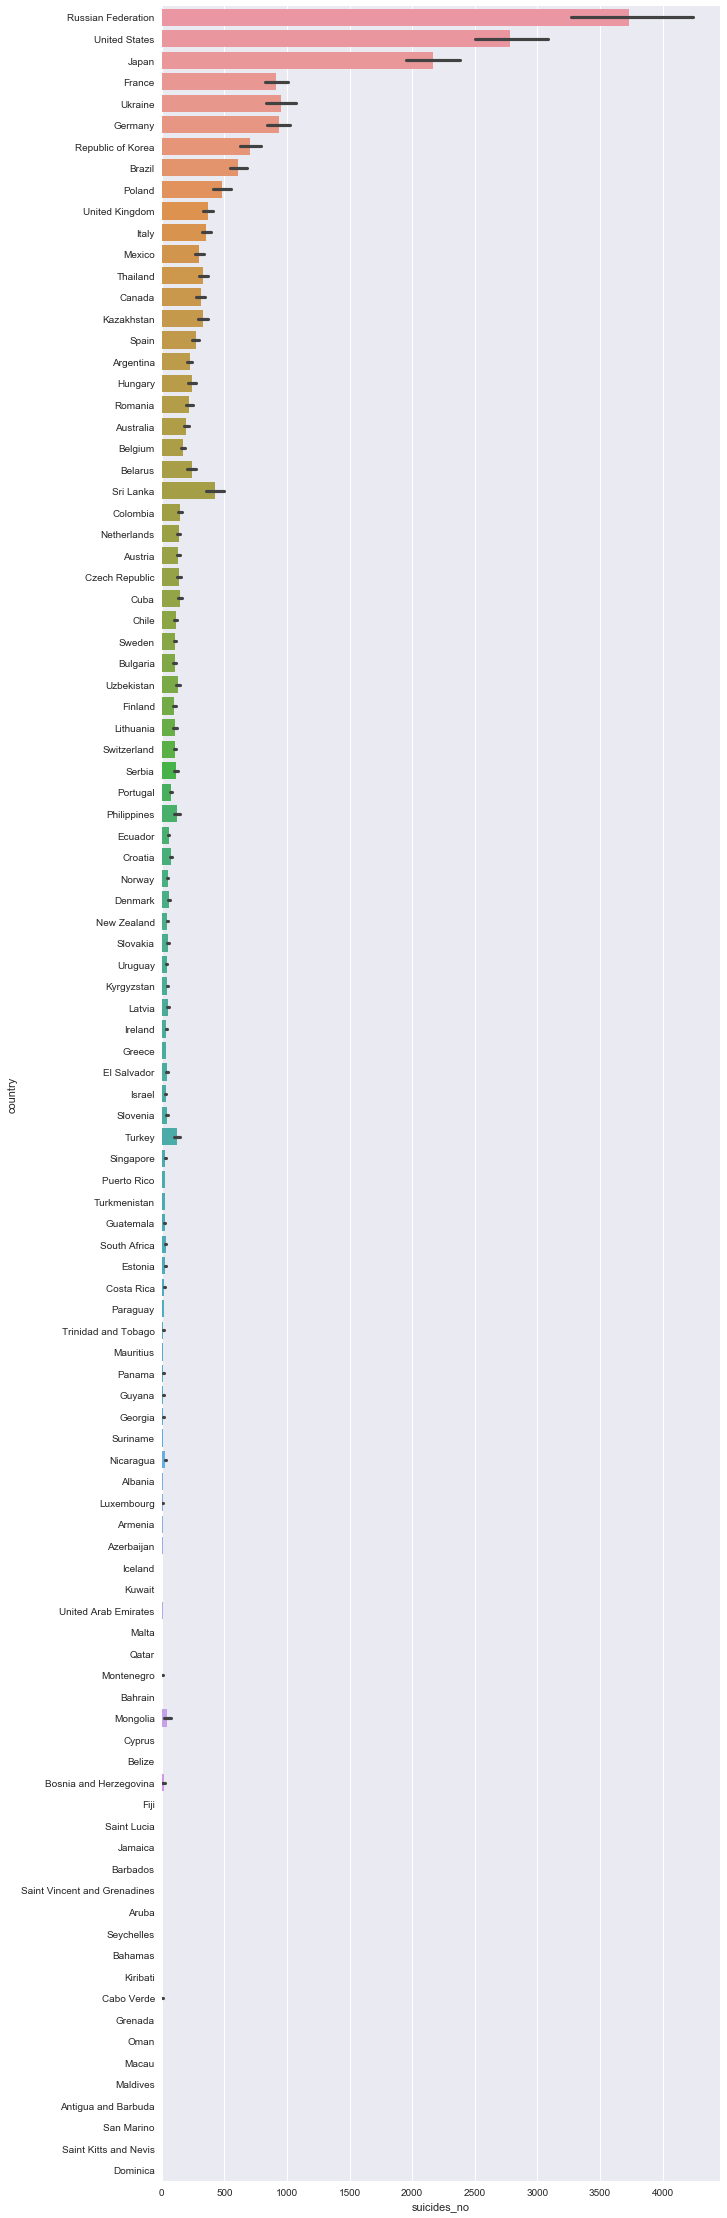

In [208]:
plt.figure(figsize=(10,40))
result = df.groupby('country').sum()['suicides_no'].reset_index().sort_values('suicides_no', ascending=False)
sns.barplot(x='suicides_no', y='country', data=df, order=result['country'])

There are three countries (Rusia, USA and Japon) where the number of suicides is considerably higher than the rest of the countries. We will analyze this countris separately. Because of the population of these coutries it is convenient to plot the suicides/100k population but the data of field is per grup of age. 

# Suicides by age, gender and generation

Note that here is represented the total number of suicides per group of age. More interesting would be analyze the number of suicides pero 100k population for each age group.

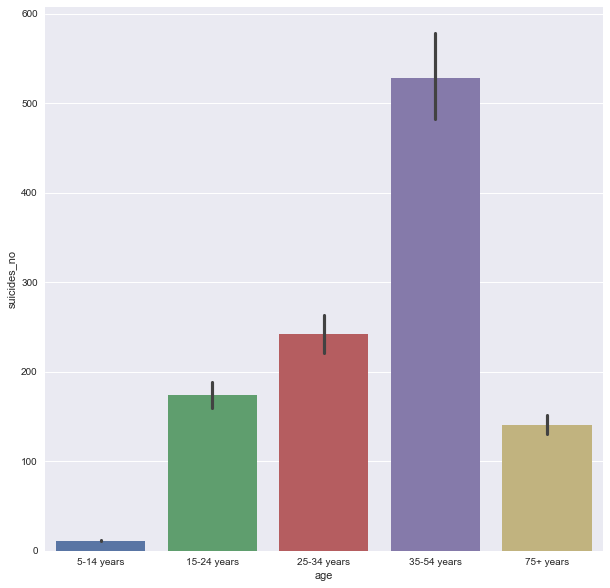

In [198]:
plt.figure(figsize=(10,10))
sns.barplot(x='age', y='suicides_no', data=df, \
            order=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "75+ years"])

People with age betwen 35-54 years comitte the more suicides. In the following plot we can see that both male and female, have the highest value of suicides in these ages. 

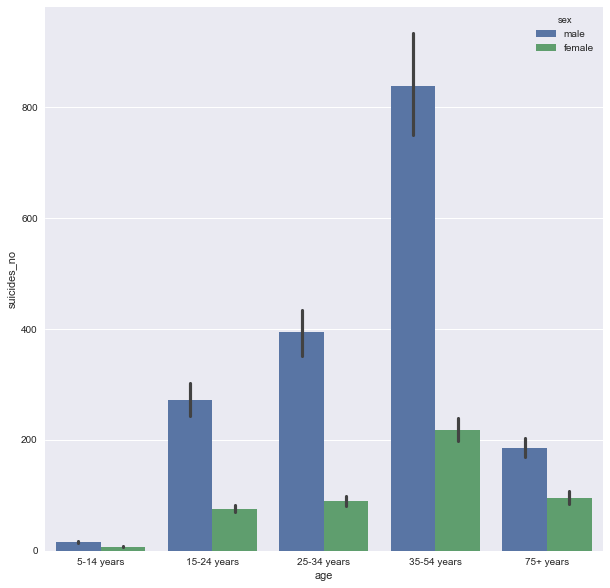

In [195]:
plt.figure(figsize=(10,10))
sns.barplot(x='age', y='suicides_no', data=df, hue='sex', \
            order=["5-14 years", "15-24 years", "25-34 years", "35-54 years", "75+ years"])

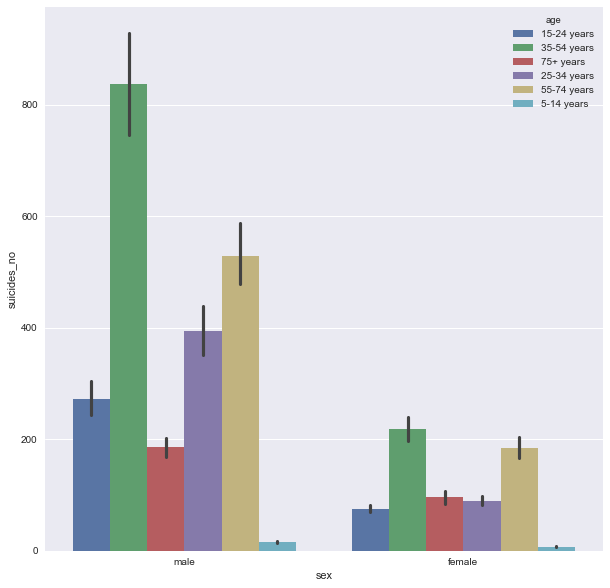

In [196]:
plt.figure(figsize=(10,10))
sns.barplot(x='sex', y='suicides_no', data=df, hue='age')